# Understanding Positional Encoding in Transformers

Transformers process input sequences in parallel, unlike RNNs or LSTMs, which process one word at a time. This parallelism is key to their efficiency but introduces a problem: without a mechanism to track the order of words, the transformer would lose the sequence information vital for understanding language.

Positional encoding solves this by adding information about word positions directly to the input embeddings, allowing the transformer to infer the order and structure of the sequence.

## How Positional Encoding Works

The key idea is to represent positions as continuous values rather than discrete numbers. Positional encodings are added to the word embeddings before they are fed into the transformer layers. These encodings use trigonometric functions to map positions into a high-dimensional space, enabling smooth generalization and easy differentiation between relative positions.

The formula for the positional encoding is:

$PE_{(pos,2i)} = sin(\frac{pos}{10000^{\frac{2i}{d}}})$

$PE_{(pos,2i+1)} = cos(\frac{pos}{10000^{\frac{2i}{d}}})$

Where:
- $pos$ is the position in the sequence
- $i$ is the dimension index
- $d$ is the embedding dimension

In [75]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

seq_len = 10
d_model = 6

In [76]:
# Create empty tensor for positional encoding matrix
pe = torch.zeros(seq_len, d_model)
pe

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [77]:
# Create position tensor: shape (seq_len, 1)
# [[0], [1], [2], ..., [seq_len-1]]
position  = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
# or pe = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [78]:
num_i = torch.arange(0, d_model, 2).float()
num_i

tensor([0., 2., 4.])

In [79]:
denominator = torch.pow(10000, num_i/d_model)
denominator

tensor([  1.0000,  21.5443, 464.1590])

In [80]:
# Apply sine to even indices
pe[:, 0::2] = torch.sin(position / denominator)
# Apply cosine to odd indices
pe[:, 1::2] = torch.cos(position / denominator)

# Add batch dimension: (1, seq_len, d_model)
# pe = pe.unsqueeze(0)
pe

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [87]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model:int, seq_len: int) -> None:
        super().__init__()
        self.d_model = d_model
        self.seq_len = seq_len

    def forward(self):
        pe = torch.zeros(seq_len, d_model)
        position = torch.arange(self.seq_len).reshape(self.seq_len, 1)

        num_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, num_i/self.d_model)
        
        # Apply sine to even indices
        pe[:, 0::2] = torch.sin(position / denominator)
        # Apply cosine to odd indices
        pe[:, 1::2] = torch.cos(position / denominator)
        return pe


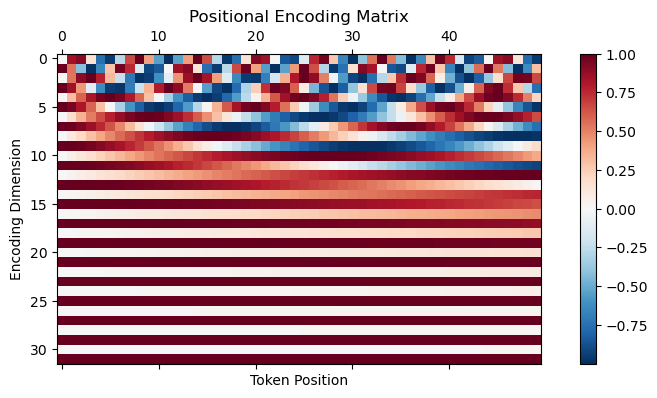

In [96]:
# Create instance and generate positional encodings
seq_len = 50  # sequence length
d_model = 32   # embedding dimension
pos_encoder = PositionalEncoding(d_model, seq_len)
y = pos_encoder.forward()

# Create the plot with blue-orange colormap
plt.figure(figsize=(10, 4))
cax = plt.matshow(y.numpy().transpose(), cmap='RdBu_r', fignum=1)  # RdBu_r gives blue-orange contrast
plt.gcf().colorbar(cax)
plt.xlabel('Token Position')
plt.ylabel('Encoding Dimension')
plt.title('Positional Encoding Matrix')
plt.show()

